In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this, we will use the "Dogs & Cats" dataset that can be downloaded from Kaggle.



### Importing libraries:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img


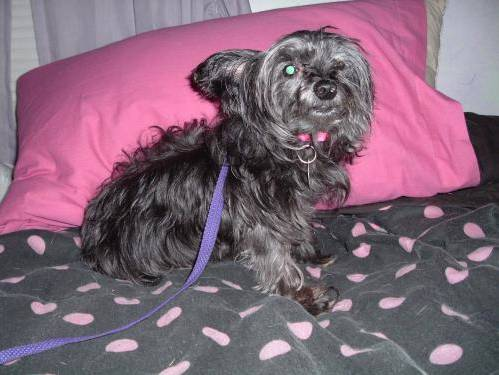

In [14]:
path = 'data/train/dogs/'
name = 'dog.0.jpg'
fullname = f'{path}/{name}'
load_img(fullname)


In [40]:
def make_model():

    inputs = keras.Input(shape = (150, 150, 3))


    conv = keras.layers.Conv2D(
        32, 
        (3,3),
     activation = 'relu', 
     input_shape = (150,150,3)
     
     )(inputs)


    pooling = keras.layers.MaxPooling2D(pool_size = (2,2))(conv)


    vectors = keras.layers.Flatten()(pooling)

    inner = keras.layers.Dense(64, activation= 'relu')(vectors)

    outputs = keras.layers.Dense(1, activation= 'sigmoid')(inner)

    


    model = keras.Model(inputs, outputs)


    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

    loss = keras.losses.BinaryCrossentropy(from_logits=False)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


    model.summary()

    return model



In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255) 

In [52]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/actual/train/',
        batch_size= 20,
        target_size= (150, 150),
        class_mode='binary',
        shuffle= True 
)


Found 20000 images belonging to 2 classes.


In [51]:

val_dg = ImageDataGenerator(rescale=1./255) 

val_ds = val_datagen.flow_from_directory(
        './data/actual/validation/',
        batch_size= 20,
        target_size= (150, 150),
        class_mode='binary',
        shuffle= True )



Found 5000 images belonging to 2 classes.


In [53]:
model = make_model()



history=model.fit(
    train_ds,

    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 175232)            0         
                                                                 
 dense_14 (Dense)            (None, 64)                11214912  
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                          

In [50]:


training_accuracy = np.array(history.history['accuracy'])

print(f'Median of training accuracy: {np.median(training_accuracy).round(2)}')


Median of training accuracy: 0.52


In [54]:
#Q4

training_loss = np.array(history.history['loss'])

print(f'Standard deviation of training loss: {np.std(training_loss).round(4)}')


Standard deviation of training loss: 0.0129


In [55]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255) 


In [56]:
history=model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
     validation_data=val_ds,
    validation_steps=50
)


Epoch 1/10
100/100 [==============================] - 3s 33ms/step - loss: 0.6425 - accuracy: 0.6170 - val_loss: 0.6521 - val_accuracy: 0.5950
Epoch 2/10
100/100 [==============================] - 3s 33ms/step - loss: 0.6369 - accuracy: 0.6405 - val_loss: 0.6449 - val_accuracy: 0.6140
Epoch 3/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6402 - accuracy: 0.6125 - val_loss: 0.6276 - val_accuracy: 0.6520
Epoch 4/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6170 - accuracy: 0.6480 - val_loss: 0.7058 - val_accuracy: 0.5690
Epoch 5/10
100/100 [==============================] - 3s 32ms/step - loss: 0.6387 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6460
Epoch 6/10
100/100 [==============================] - 3s 33ms/step - loss: 0.6242 - accuracy: 0.6395 - val_loss: 0.6709 - val_accuracy: 0.6060
Epoch 7/10
100/100 [==============================] - 3s 34ms/step - loss: 0.6199 - accuracy: 0.6400 - val_loss: 0.6109 - val_accuracy: 0.6430

<!-- Question 5: Mean for validation loss -->

#### Question 5: Mean for validation loss

In [59]:


training_loss = np.array(history.history['loss'])

print(f'Mean for validation  loss: {np.mean(training_loss)}')


Mean for validation  loss: 0.62679163813591


#### Question 6: Avg validation accuracy for epochs 5-10 


In [61]:
val_last5= history.history['accuracy'][5:10]
val_last5

[0.6395000219345093,
 0.6399999856948853,
 0.6474999785423279,
 0.6620000004768372,
 0.6414999961853027]

In [62]:


print('Avg val accuracy for 5 last epochs: ',np.average(val_last5))

Avg val accuracy for 5 last epochs:  0.6460999965667724
